In [1]:
from google.colab import drive; drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the pandas module
import pandas as pd
#Reading the files and assigning variable names
articles = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Skills group project/Group 4/articles.APOE.csv")
authors = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Skills group project/Group 4/authors.APOE.csv")
paper_count = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Skills group project/Group 4/paper_counts.csv")

In [34]:
authors

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10545039,1,K E,Morrison,KE,"Neurosciences Group, Institiute of Molecular M..."
1,10545039,2,G,Steers,G,NaN
2,10545039,3,V,Dubowitz,V,NaN
3,10558867,1,M L,Brandi,ML,"Department of Clinical Physiopathology, Univer..."
4,10558867,2,L,Becherini,L,NaN
...,...,...,...,...,...,...
56887,38091051,10,Jasmine,King,J,"Department of Biomedical Engineering, Duke Uni..."
56888,38091051,11,Allison,Ashley-Koch,A,"Duke Molecular Physiology Institute, Duke Univ..."
56889,38091051,12,Darin,Clark,D,"Quantitative Imaging and Analysis Laboratory, ..."
56890,38091051,13,Michael W,Lutz,MW,"Department of Neurology, Duke University Schoo..."


In [36]:
authors["AuthorFullname"] = authors["AuthorForename"] + " " + authors["AuthorLastname"]
import numpy as np
import matplotlib.pyplot as plt

network_analysis = authors[["PMID", "AuthorFullname"]]
network_analysis

,PMID,AuthorFullname
0,10545039,K E Morrison
1,10545039,G Steers
2,10545039,V Dubowitz
3,10558867,M L Brandi
4,10558867,L Becherini
...,...,...
56887,38091051,Jasmine King
56888,38091051,Allison Ashley-Koch
56889,38091051,Darin Clark
56890,38091051,Michael W Lutz


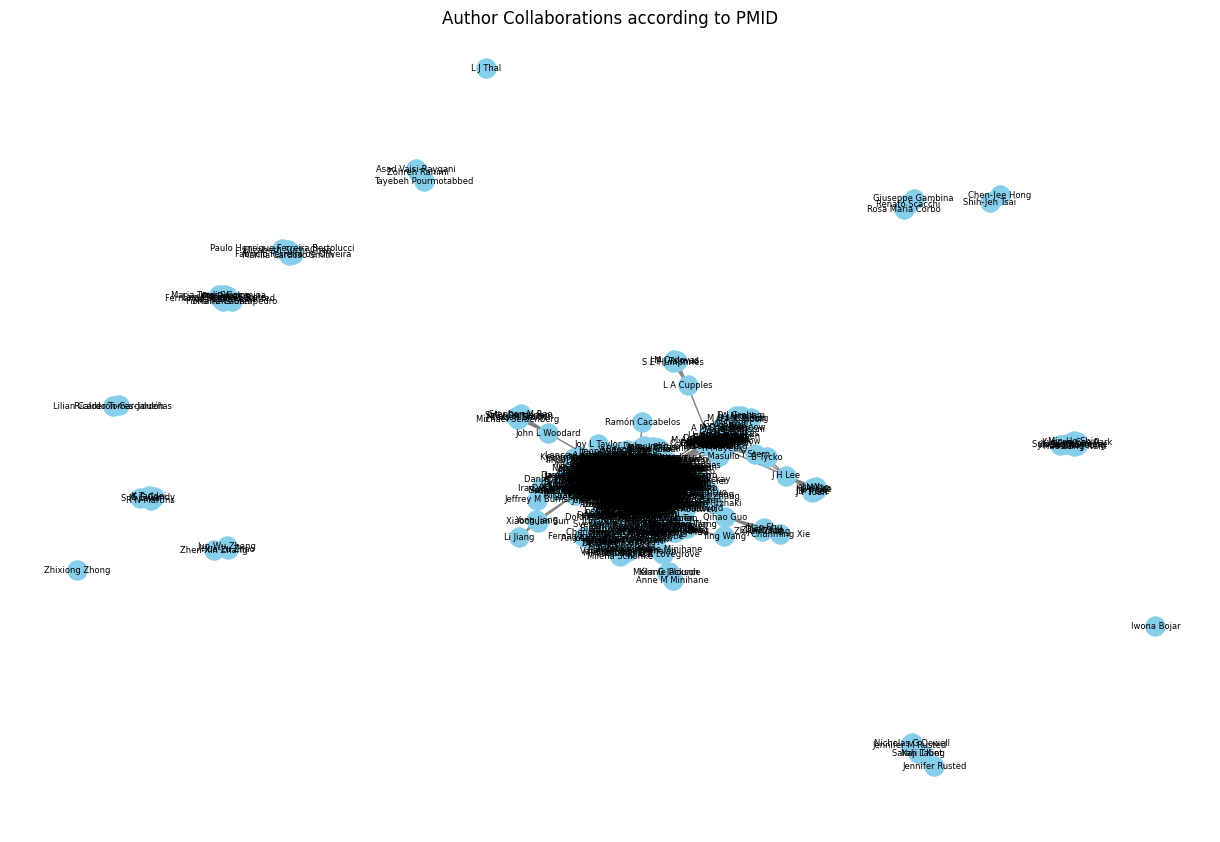

In [122]:
import networkx as nx
top_authors = network_analysis["AuthorFullname"].value_counts().nlargest(1000).index
df_top1000 = network_analysis[network_analysis["AuthorFullname"].isin(top_authors)]

G = nx.Graph()

for pmid, group in df_top1000.groupby('PMID'):
    authors = group['AuthorFullname'].tolist()
    for author1 in authors:
        for author2 in authors:
            if author1 != author2:
              G.add_edge(author1, author2)
            else:
              G.add_node(author1)

pos = nx.spring_layout(G)

fig = plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5)
plt.title('Author Collaborations according to PMID')
plt.show()

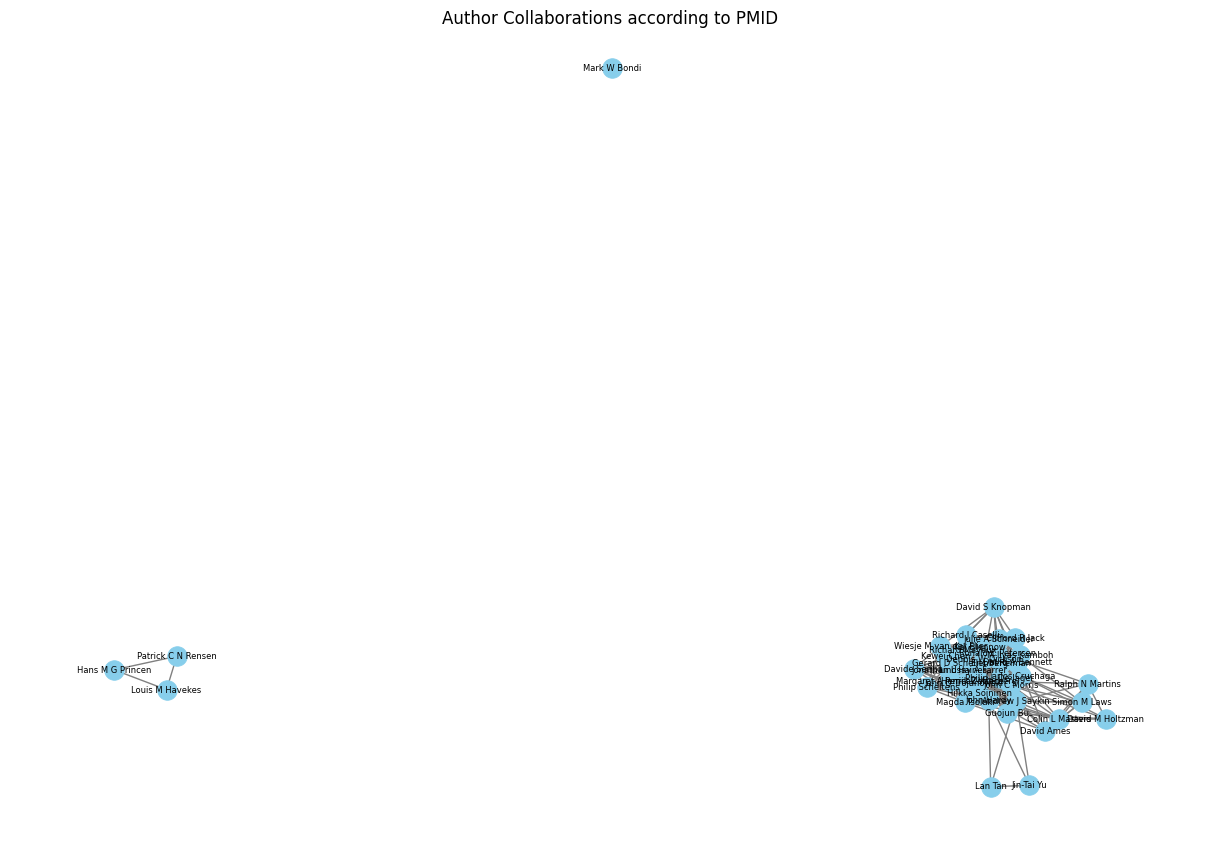

In [123]:
top_authors = network_analysis["AuthorFullname"].value_counts().nlargest(40).index
df_top40 = network_analysis[network_analysis["AuthorFullname"].isin(top_authors)]

G = nx.Graph()

for pmid, group in df_top40.groupby('PMID'):
    authors = group['AuthorFullname'].tolist()
    for author1 in authors:
        for author2 in authors:
            if author1 != author2:
              G.add_edge(author1, author2)
            else:
              G.add_node(author1)

pos = nx.spring_layout(G)

fig = plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5)
plt.title('Author Collaborations according to PMID')
plt.show()